En este proyecto analizaremos un dataset sobre el rendimiento estudiantil. Resolveremos preguntas como:

1.- ¿Cómo influye el tiempo de estudio semanal en el GPA de los estudiantes?
Esta pregunta busca explorar si hay una correlación entre el tiempo que los estudiantes dedican a estudiar cada semana y su rendimiento académico medido por el GPA.

2.-¿Existe una relación entre el nivel educativo de los padres y el rendimiento académico de los estudiantes?
Aquí podrías investigar si los estudiantes cuyos padres tienen un nivel educativo más alto tienden a obtener mejores calificaciones.

3.-¿Cómo afectan las ausencias a las calificaciones finales de los estudiantes?
Esta pregunta pretende explorar si existe una relación entre el número de ausencias de un estudiante y su desempeño académico.

4.-¿El apoyo parental tiene un impacto significativo en el rendimiento académico?
Podrías analizar si los estudiantes que reciben más apoyo de sus padres tienen un mejor rendimiento en la escuela.

5.-¿Participar en actividades extracurriculares (deportes, música, voluntariado) está asociado con un mejor rendimiento académico?
Esta pregunta examina si la participación en actividades extracurriculares tiene una influencia positiva en el GPA de los estudiantes.

6.-¿Hay diferencias significativas en el rendimiento académico según el género o la etnia?
Podrías explorar si existen disparidades en las calificaciones de los estudiantes basadas en su género o etnia.

Este proyecto tiene como objetivo predecir el rendimiento académico de los estudiantes basado en una variedad de factores sociodemográficos y educativos. Utilizando algoritmos de machine learning, se busca identificar patrones clave que influyen en el éxito o el bajo rendimiento académico.

El rendimiento académico es un indicador clave del éxito estudiantil y puede verse influenciado por diversos factores como la edad, el tiempo de estudio, la participación en actividades extracurriculares, el apoyo familiar, entre otros. A través de este proyecto, pretendemos aplicar técnicas de análisis predictivo para proporcionar recomendaciones y análisis que permitan a los docentes y padres optimizar las estrategias educativas.

El objetivo principal es construir un modelo de clasificación que pueda predecir la clase de rendimiento académico (GPA) de un estudiante basándose en las características disponibles en el dataset.

## 1.- Cargar el dataset


In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [5]:
#Leemos el dataset
df = pd.read_csv('Student_performance_data _.csv')
#Mostramos las primeras lineas del dataset
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


## 2.- EDA

In [7]:
#Mostramos la información o contenido del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [8]:
#Eliminamos el ID para limpiar el dataset ya que al ser valores únicos no son de ayuda para el modelo
df.drop("StudentID", axis=1, inplace=True)

In [9]:
df.shape

(2392, 14)

In [10]:
#Aplicamos el método describe()
df.describe()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [11]:
#Verificamos si hay valores duplicados
df.duplicated().sum()

0

In [12]:
#Verificamos si hay valores ausentes
df.isna().sum()

Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

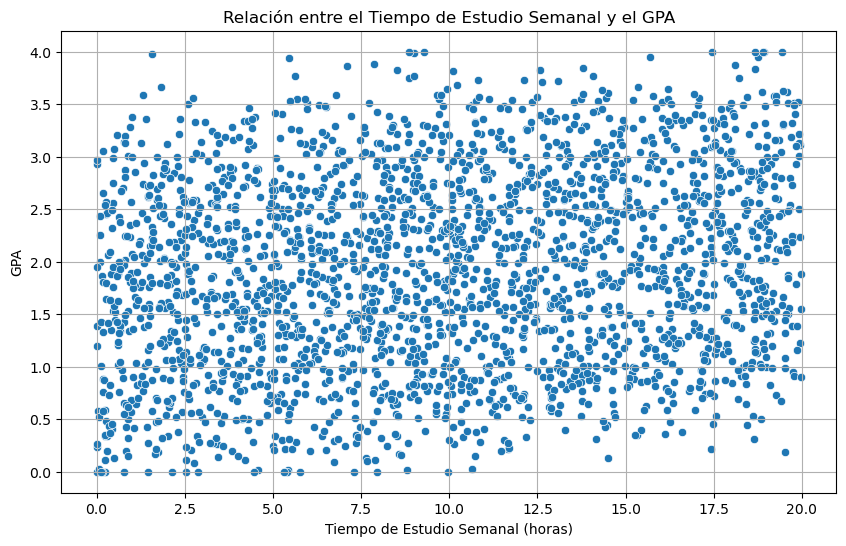

In [13]:
#Creando un gráfico de dispersión para relacioner el GPA con el tiempo de estudio semanal
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='StudyTimeWeekly', y='GPA')
plt.title('Relación entre el Tiempo de Estudio Semanal y el GPA')
plt.xlabel('Tiempo de Estudio Semanal (horas)')
plt.ylabel('GPA')
plt.grid(True)
plt.show()

C:\Users\diego\AppData\Local\Temp\ipykernel_10916\3932228325.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_gpa = df.groupby('StudyTimeGroup')['GPA'].mean().reset_index()
C:\Users\diego\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


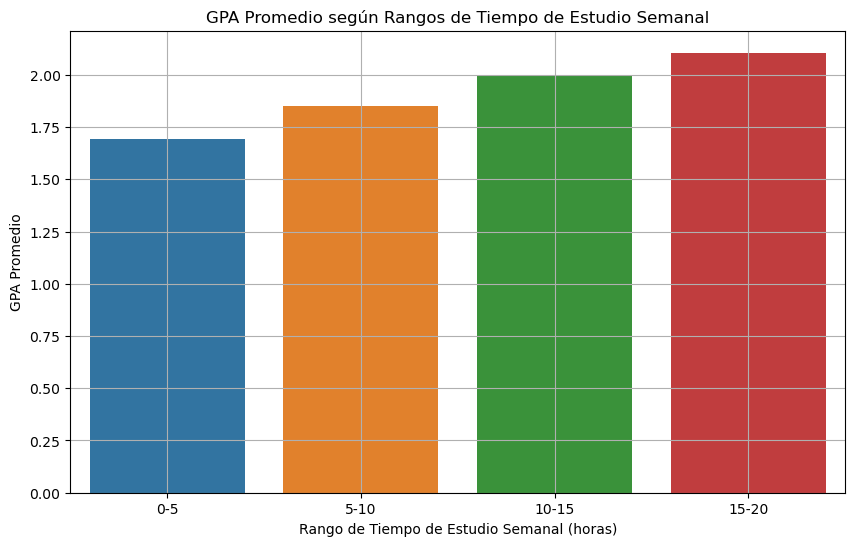

In [14]:
#Segmentamos y clasificamos los datos en intervalos de 5 horas empezando desde el 0(minimo) hasta el 20(máximo)
df['StudyTimeGroup'] = pd.cut(df['StudyTimeWeekly'], bins=[0, 5, 10, 15, 20], #segmentación 0-5, 5-10, etc.
                              labels=['0-5', '5-10', '10-15', '15-20']) #etiquetas
#Agrupamos
average_gpa = df.groupby('StudyTimeGroup')['GPA'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=average_gpa, x='StudyTimeGroup', y='GPA')
plt.title('GPA Promedio según Rangos de Tiempo de Estudio Semanal')
plt.xlabel('Rango de Tiempo de Estudio Semanal (horas)')
plt.ylabel('GPA Promedio')
plt.grid(True)
plt.show()

Gráfico de Dispersión:
El gráfico de dispersión sugiere que hay una ligera tendencia positiva entre el tiempo de estudio semanal y el GPA. A medida que los estudiantes dedican más horas al estudio, el GPA tiende a aumentar, aunque la relación no es muy fuerte. Hay una gran dispersión de puntos, lo que indica que otros factores también influyen en el GPA.

Gráfico de Barras:
El GPA promedio aumenta gradualmente a medida que el tiempo de estudio semanal aumenta hasta alrededor de 20 horas por semana. Los rangos de 15-20 horas de estudio parecen estar asociados con los GPA más altos, lo que sugiere que este podría ser un rango de estudio ideal para muchos estudiantes.


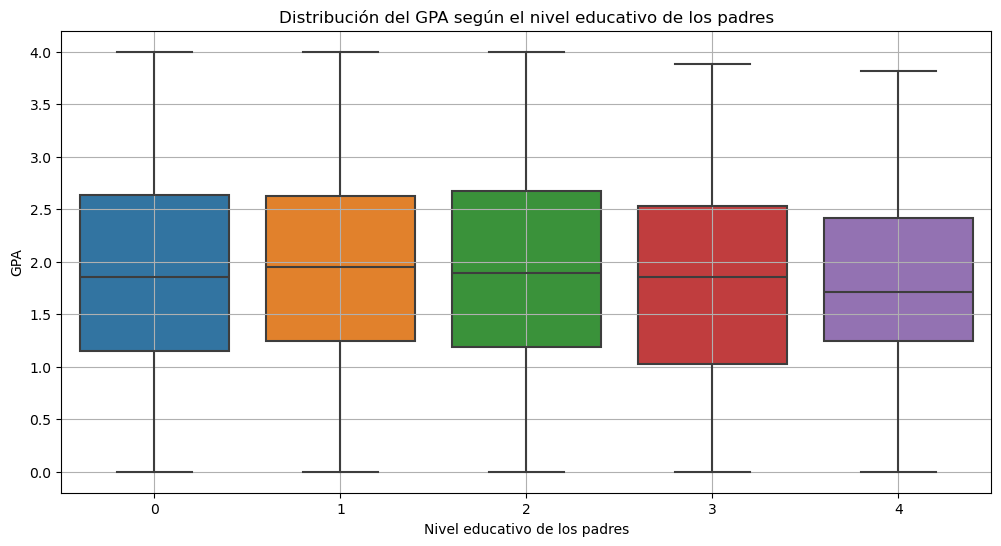

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='ParentalEducation', y='GPA')
plt.title('Distribución del GPA según el nivel educativo de los padres')
plt.xlabel('Nivel educativo de los padres')
plt.ylabel('GPA')
plt.grid(True)
plt.show()

Se observa alguna variabilidad en los datos,aunque no es lo suficientemente fuerte como para afirmar que el nivel educativo de los padres tiene un impacto significativo en el rendimiento académico de los estudiantes

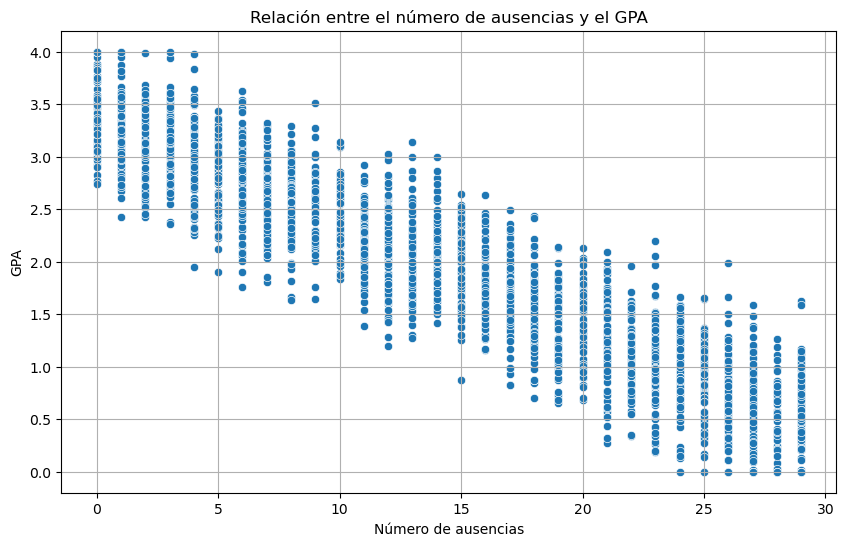

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Absences', y='GPA')
plt.title('Relación entre el número de ausencias y el GPA')
plt.xlabel('Número de ausencias')
plt.ylabel('GPA')
plt.grid(True)
plt.show()

Los resultados sugieren que las ausencias tienen un impacto significativo y negativo en el GPA de los estudiantes

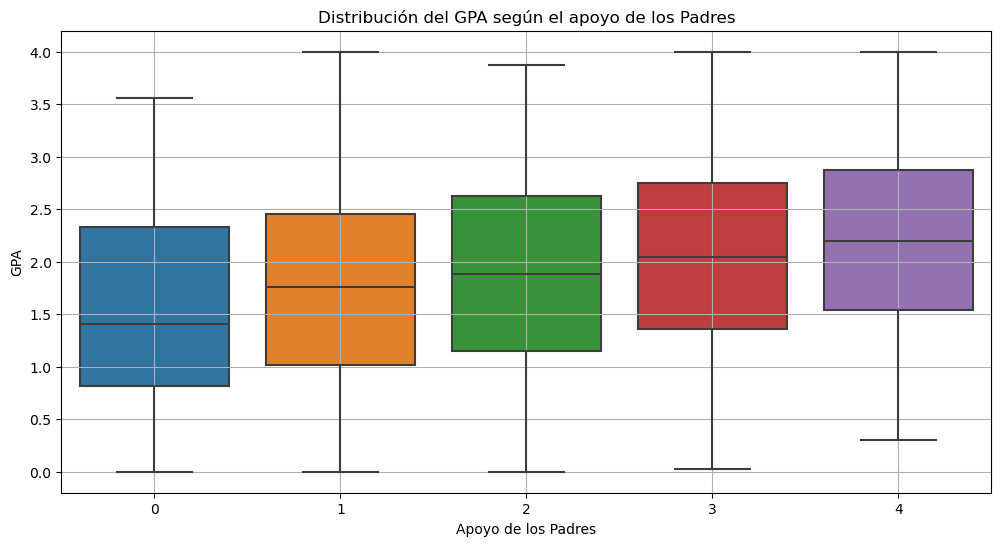

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='ParentalSupport', y='GPA')
plt.title('Distribución del GPA según el apoyo de los Padres')
plt.xlabel('Apoyo de los Padres')
plt.ylabel('GPA')
plt.grid(True)
plt.show()

Se observa que el GPA de los estudiantes tiende a aumentar a mayor a poyo de los padres.

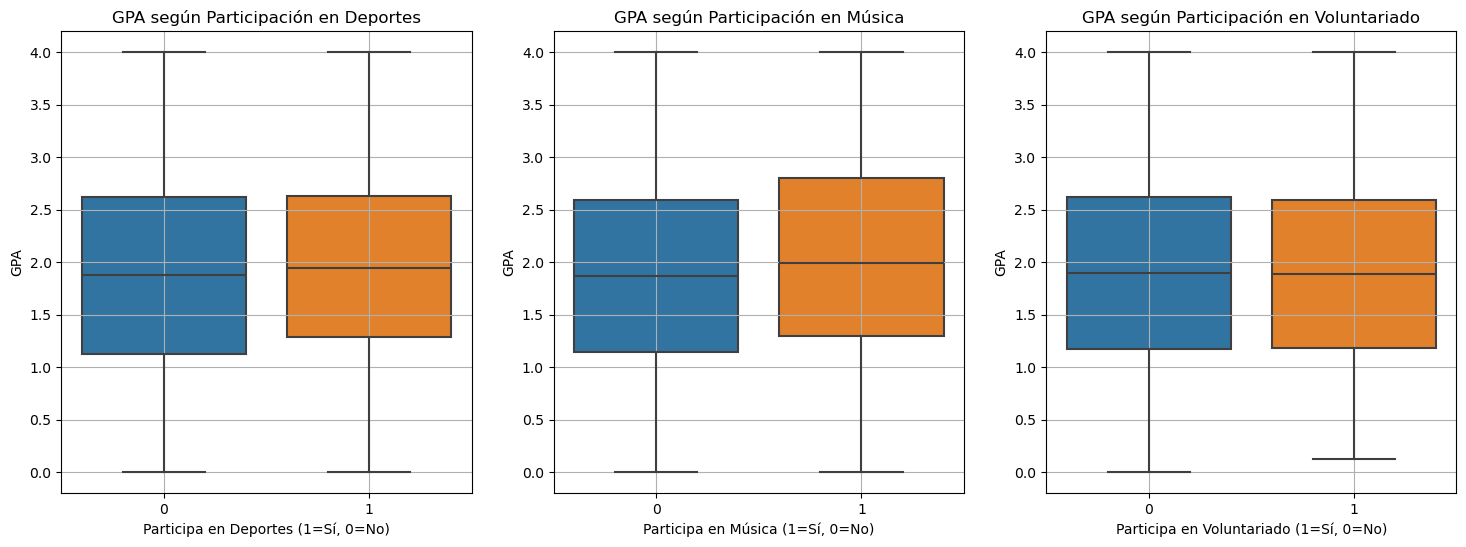

In [22]:
plt.figure(figsize=(18, 6))
# Gráfico 1: Deportes
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='Sports', y='GPA')
plt.title('GPA según Participación en Deportes')
plt.xlabel('Participa en Deportes (1=Sí, 0=No)')
plt.ylabel('GPA')
plt.grid(True)

# Gráfico 2: Música
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='Music', y='GPA')
plt.title('GPA según Participación en Música')
plt.xlabel('Participa en Música (1=Sí, 0=No)')
plt.ylabel('GPA')
plt.grid(True)

# Gráfico 3: Voluntariado
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='Volunteering', y='GPA')
plt.title('GPA según Participación en Voluntariado')
plt.xlabel('Participa en Voluntariado (1=Sí, 0=No)')
plt.ylabel('GPA')
plt.grid(True)


plt.show()

Deportes:
Existe una diferencia estadísticamente significativa en el GPA para los estudiantes que practican deportes. Los estudiantes que participan en deportes tienden a tener un rendimiento académico diferente al de aquellos que no participan.

Música:
También hay una diferencia estadísticamente significativa en el GPA de los estudiantes que participan en actividades musicales. Los estudiantes que participan en música tienden a mostrar los GPA más altos a comparación de los que no la practican.

Voluntariado:
No se observa una diferencia significativa en el GPA según la participación en actividades de voluntariado.


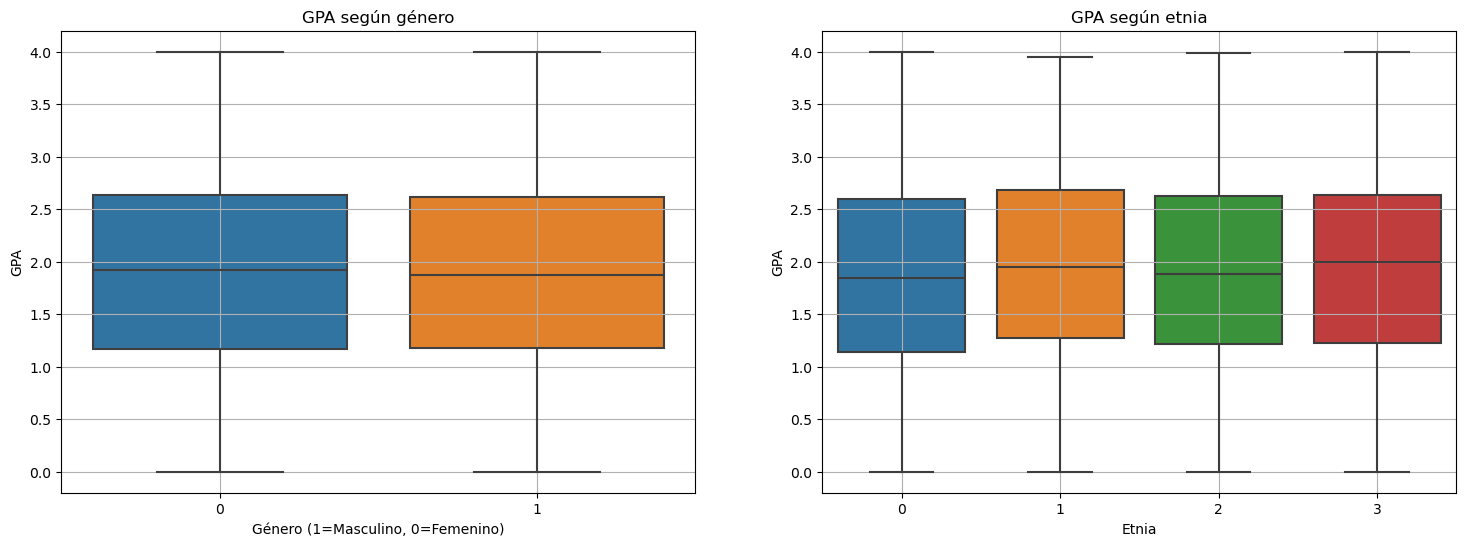

In [24]:
plt.figure(figsize=(18, 6))

# Gráfico 1: Género
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Gender', y='GPA')
plt.title('GPA según género')
plt.xlabel('Género (1=Masculino, 0=Femenino)')
plt.ylabel('GPA')
plt.grid(True)

# Gráfico 2: Etnia
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Ethnicity', y='GPA')
plt.title('GPA según etnia')
plt.xlabel('Etnia')
plt.ylabel('GPA')
plt.grid(True)

plt.show()

Las gráficas no muestran que existen diferencias significativas GPA según el género o la etnia de los estudiantes. Una de las etnias (1) tiende a conseguir ligeros mejores resultados que las demás

## 3.- Modelado

## Regresión Lineal

In [45]:
# Separar las características (X) de la variable objetivo (y)
X = df.drop(['GPA'], axis=1)
y = df['GPA']

In [47]:
# División del conjunto de datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=28)

print('x_train size',X_train.shape)
print('y_train size',y_train.shape)
print('x_test size',X_test.shape)
print('y_test size',y_test.shape)

x_train size (1913, 14)
y_train size (1913,)
x_test size (479, 14)
y_test size (479,)


In [55]:
# Convertir las variables categóricas en dummies para modelos de regresión
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [57]:
# Inicializar el modelo de Regresión Lineal
model = LinearRegression()

In [59]:
# Entranamos el modelo
model.fit(X_train, y_train)

LinearRegression()

In [61]:
# prediccion
y_pred = model.predict(X_test)

In [78]:
# metricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("mae", mae)
print("mse", mse)
print("r2", r2)

mae 0.15262069151087354
mse 0.034315677929902796
r2 0.9589850362759019


## Random Forest

In [74]:
random_forest_model = RandomForestRegressor(random_state=28)


In [76]:
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=28)

In [80]:
y_pred_rf = random_forest_model.predict(X_test)

In [84]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("mae", mae_rf)
print("mse", mse_rf)
print("r2", r2_rf)

mae 0.15714584660376013
mse 0.039292256676221236
r2 0.953036903845958


## Decision Tree

In [87]:
decision_tree_model = DecisionTreeRegressor(random_state=28)


In [89]:
decision_tree_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=28)

In [91]:
y_pred_dt = decision_tree_model.predict(X_test)


In [93]:
# Evaluación de Random Forest
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("mae", mae_dt)
print("mse", mse_dt)
print("r2", r2_dt)

mae 0.21785652284913096
mse 0.09124658567456248
r2 0.8909397795073493


## XGBRegressor

In [96]:
xgb_model = XGBRegressor(random_state=28)

In [98]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=28, ...)

In [100]:
y_pred_xgb = xgb_model.predict(X_test)

In [102]:
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("mae", mae_xgb)
print("mse", mse_xgb)
print("r2", r2_xgb)

mae 0.16005925292525577
mse 0.042281662553479885
r2 0.9494638905468231


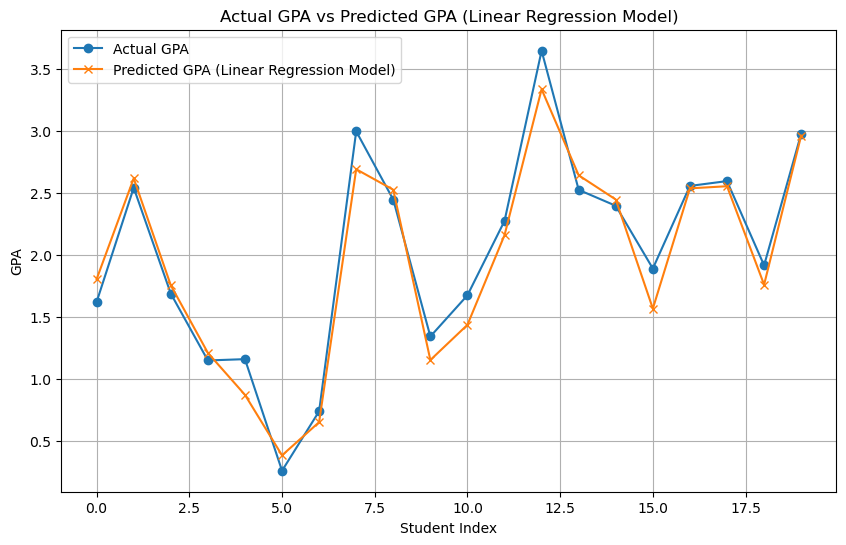

,Actual GPA,Predicted GPA (Linear Regression Model)
1672,1.622465,1.806154
334,2.542214,2.617752
364,1.689528,1.756488
1252,1.150966,1.212060
862,1.161555,0.874192
1039,0.262861,0.386755
1531,0.741528,0.654216
947,2.996856,2.691180
600,2.446157,2.525893
1729,1.344086,1.154480


In [118]:
# Crear un DataFrame para comparar los valores predichos con los reales
comparison_df = pd.DataFrame({
    'Actual GPA': y_test,
    'Predicted GPA (Linear Regression Model)': y_pred
})

# Visualización de las primeras 20 comparaciones
comparison_df_sample = comparison_df.head(20)

# Plot de las comparaciones
plt.figure(figsize=(10,6))
plt.plot(comparison_df_sample['Actual GPA'].values, label='Actual GPA', marker='o')
plt.plot(comparison_df_sample['Predicted GPA (Linear Regression Model)'].values, label='Predicted GPA (Linear Regression Model)', marker='x')
plt.title('Actual GPA vs Predicted GPA (Linear Regression Model)')
plt.xlabel('Student Index')
plt.ylabel('GPA')
plt.legend()
plt.grid(True)
plt.show()

comparison_df_sample

## Conclusión

Aunque todos los modelso predijeron bastante bien Regresión Lineal fue el mejor modelo en este caso.

El rendimiento del modelo de Regresión Lineal fue bastante alto, y podemos afirmarlo basándonos en las siguientes métricas:

R² Score: El valor de 0.957 indica que el modelo puede explicar el 95.7% de la variabilidad en el GPA de los estudiantes. El modelo esta muy cercano a 1 significa que el modelo se ajusta bien a los datos y las predicciones son bastante precisas.

MAE (Mean Absolute Error): El valor de 0.1508 sugiere que, en promedio, el error entre el valor predicho y el valor real es de aproximadamente 0.15 puntos de GPA, lo cual es un error relativamente bajo considerando que el GPA tiene un rango de 0 a 4.

Comparación visual: Al observar el gráfico y la tabla de comparación, se puede ver que las predicciones están bastante alineadas con los valores reales de GPA, con solo ligeras diferencias.

En resumen, el modelo de Regresión Lineal hizo una predicción precisa y confiable del GPA.